In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import (
    InputLayer, Conv2D, MaxPooling2D, Flatten,
    Dense, Reshape, Conv2DTranspose, Input
)
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.backend import epsilon
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import tensorflow as tf
from keras.losses import binary_crossentropy
from keras.backend import eval

In [2]:
from keras.layers import Input, Dense, Conv2D
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/IIITB-FACES

/content/drive/MyDrive/IIITB-FACES


In [5]:
data_dir="/content/drive/MyDrive/IIITB-FACES"

In [6]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define paths and parameters
dataset_directory = data_dir
image_size = (224, 224)  # Resize images to this size
num_classes = len(os.listdir(dataset_directory))  # Number of classes
print(num_classes)

# Initialize lists to store data
x_data = []
y_data = []
y_data_SVM=[]
labels = []

# Load and preprocess images and labels
for class_idx, class_name in enumerate(sorted(os.listdir(dataset_directory))):
    class_dir = os.path.join(dataset_directory, class_name)

    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)

        # Load and preprocess image
        image = load_img(image_path, target_size=image_size)
        image = img_to_array(image) / 255.0  # Normalize pixel values
        x_data.append(image)

        # target data
        y_data_SVM.append(class_name)

        # Create one-hot encoded label
        label = to_categorical(class_idx, num_classes=num_classes)
        y_data.append(label)

print(len(x_data))
print(len(y_data))

# Convert lists to numpy arrays
x_data = np.array(x_data)
y_data = np.array(y_data)
y_data_SVM=np.array(y_data_SVM)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

# Split data into train and test sets
x_train_SVM, x_test_SVM, y_train_SVM, y_test_SVM = train_test_split(
    x_data, y_data_SVM, test_size=0.2, random_state=42, stratify=y_data
)



print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
print(x_train.shape)
print(y_train.shape)
print(y_train_SVM.shape)
print(x_train_SVM.shape)

50
840
840
672
168
672
168
(672, 224, 224, 3)
(672, 50)
(672,)
(672, 224, 224, 3)


In [7]:
x_train.shape

(672, 224, 224, 3)

In [8]:
print(y_train.shape)

(672, 50)


In [7]:
x_train= x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [10]:
x_train.shape

(672, 150528)

In [8]:

def autoencoder_model(layer=3):
    if layer == 2:
        hidden_layer_sizes = [128, 64]
    elif layer == 3:
        hidden_layer_sizes = [256, 128, 64]
    elif layer == 4:
        hidden_layer_sizes = [512,256, 128, 64]
    elif layer == 5:
       hidden_layer_sizes = [512,256, 128, 64,32]
    elif layer == 6:
       hidden_layer_sizes = [512,256, 128, 64,32,16]
    elif layer == 7:
       hidden_layer_sizes = [512,256, 128, 64,32,16,8]



  # Define the input layer
    input_dim = x_train.shape[1]
    input_layer = Input(shape=(input_dim,))

# Define the encoder layers

 #hidden_layer_sizes = [256, 128, 64]

    encoder = input_layer
    for layer_size in hidden_layer_sizes:
        encoder = Dense(layer_size, activation='relu')(encoder)

# Define the decoder layers
    decoder = encoder
    for layer_size in reversed(hidden_layer_sizes):
        decoder = Dense(layer_size, activation='relu')(decoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Create the autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoder)

# Print a summary of the autoencoder model
    autoencoder.summary()
    return autoencoder

In [9]:
def model_fit(epoch):
    epochs = epoch
    batch_size = 32

    autoencoder.fit(
    x_train, x_train,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(x_test, x_test),)

In [10]:
def find_loss(autoencoder):
    decoded_imgs = autoencoder.predict(x_test[:10])
    decoded_imgs=np.array(decoded_imgs)
    actual_imgs = x_test[:10]
    actual_imgs=np.array(actual_imgs)

    decoded_imgs = autoencoder.predict(x_test[:10])
    decoded_imgs=np.array(decoded_imgs)
    actual_imgs = x_test[:10]
    actual_imgs=np.array(actual_imgs)

    loss = binary_crossentropy(tf.convert_to_tensor(decoded_imgs), tf.convert_to_tensor(actual_imgs))
    loss_value = eval(loss)  # Convert TensorFlow tensor to NumPy value
    mean_loss = np.mean(loss_value)
    return mean_loss



In [11]:
epochs = 50
batch_size = 32
loss_different_layers=[]
for i in range(2, 8):
  print(i)
  autoencoder=autoencoder_model(i)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  model_fit(epochs)
  loss=find_loss(autoencoder)
  print(loss)
  loss_different_layers.append(loss)
  print(loss_different_layers)

2
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150528)]          0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 150528)            19418112  
                                                                 
Total params: 38706560 (147.65 MB)
Trainable params: 387065

1/1 [==============================] - 0s 30ms/step
0.633426
[0.5550719, 0.56559265, 0.5608181, 0.57191116, 0.633426]
7
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150528)]          0         
                                                                 
 dense_45 (Dense)            (None, 512)               77070848  
                                                                 
 dense_46 (Dense)            (None, 256)               131328    
                                                                 
 dense_47 (Dense)            (None, 128)               32896     
                                                                 
 dense_48 (Dense)            (None, 64)                8256      
                                                                 
 dense_49 (Dense)            (None, 32)                2080      
     

1/1 [==============================] - 0s 30ms/step
0.63158715
[0.5550719, 0.56559265, 0.5608181, 0.57191116, 0.633426, 0.63158715]


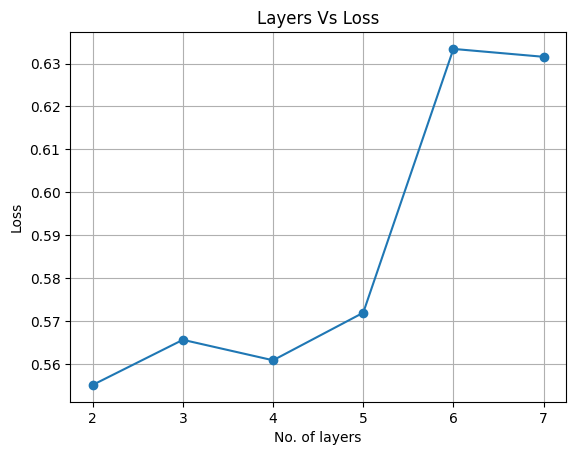

In [19]:
import matplotlib.pyplot as plt

layers = list(range(2, 8))

plt.plot(layers,loss_different_layers, marker='o', linestyle='-')
#plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('No. of layers')
plt.ylabel('Loss')
plt.title('Layers Vs Loss')
plt.grid(True)

# Display the plot
plt.show()

As the loss is least when the number of layer is 4 therefore we will proceed with 4 layer Autoencoder

1/1 [==============================] - 0s 114ms/step


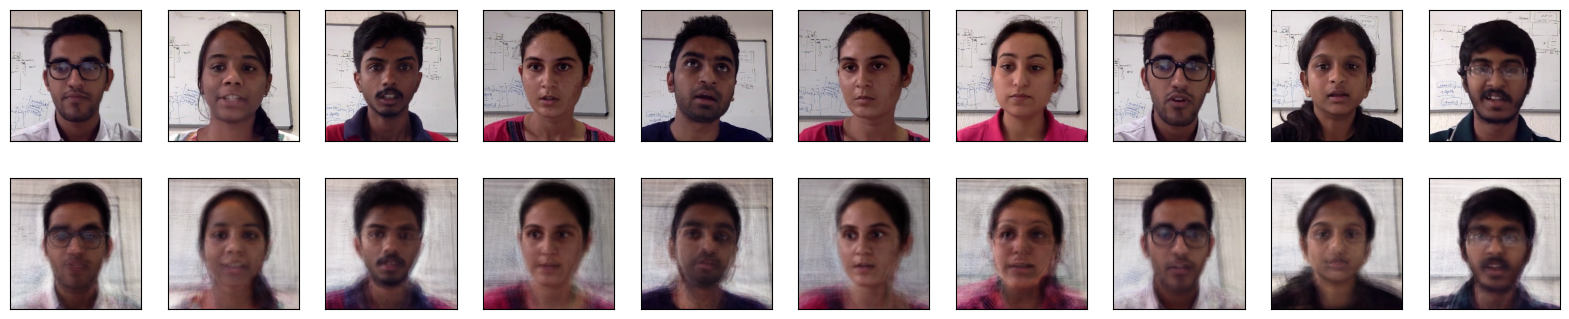

In [ ]:
decoded_imgs = autoencoder.predict(x_test[:10])
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(10):
    # Display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(224, 224, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(224, 224, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoder = Model(input_layer, encoder)

In [ ]:
encoded_train_features = encoder.predict(x_train)


21/21 [==============================] - 0s 12ms/step


In [ ]:
encoded_test_features = encoder.predict(x_test)

6/6 [==============================] - 0s 9ms/step


# **ANN Classifier on the encoded data of the autoencoder**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from keras import regularizers
from keras.layers.core import Dropout

# Define the input layer
input_dim = 64  # Example: for 224x224x3 images
num_classes = y_train.shape[1]  # Number of classes

input_layer = Input(shape=(input_dim,))

# Define the hidden layers
hidden_layer_sizes = [256, 128, 64]

hidden_layer = input_layer
for layer_size in hidden_layer_sizes:
    hidden_layer = Dense(layer_size,activation='relu')(hidden_layer)

# Define the output layer for classification
output_layer = Dense(num_classes, activation='softmax')(hidden_layer)

# Create the classification model
classification_model = Model(inputs=input_layer, outputs=output_layer)

# Print a summary of the classification model
classification_model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_7 (Dense)             (None, 256)               16640     
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 50)                3250      
                                                                 
Total params: 61,042
Trainable params: 61,042
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the classifier
classification_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the classifier using the encoded features and corresponding labels
classification_model.fit(encoded_train_features, y_train, epochs=10, batch_size=32)

Epoch 1/10
21/21 [==============================] - 2s 3ms/step - loss: 8.2992 - accuracy: 0.0699
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 2.5353 - accuracy: 0.3185
Epoch 3/10
21/21 [==============================] - 0s 3ms/step - loss: 1.5801 - accuracy: 0.5982
Epoch 4/10
21/21 [==============================] - 0s 3ms/step - loss: 1.0231 - accuracy: 0.7589
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.8408
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 0.4857 - accuracy: 0.8958
Epoch 7/10
21/21 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.9271
Epoch 8/10
21/21 [==============================] - 0s 3ms/step - loss: 0.2572 - accuracy: 0.9524
Epoch 9/10
21/21 [==============================] - 0s 3ms/step - loss: 0.2197 - accuracy: 0.9479
Epoch 10/10
21/21 [==============================] - 0s 3ms/step - loss: 0.1929 - accuracy: 0.9524


In [ ]:
pip install scikeras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# evaluate model with standardized dataset
estimator = KerasClassifier(model=classification_model, epochs=20, batch_size=5, verbose=0)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, encoded_test_features, y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 78.63% (8.16%)


# **SVM CLassifier on the encoded images by the Autoencoder**


In [ ]:
## Step 5: Initialize Classifer and fit training data
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = { 'C': [1e3, 5e3, 1e4, 5e4, 1e5],
               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],}

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(encoded_train_features, y_train_SVM)

print("Best Estimator found by Grid Search:")
print(clf.best_estimator_)


Best Estimator found by Grid Search:
SVC(C=1000.0, class_weight='balanced', gamma=0.0001)


In [ ]:
encoded_train_features.shape

(672, 64)

In [ ]:
from time import time
from sklearn.metrics import classification_report
## Step 6: Perform testing and get classification report
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(encoded_test_features)
#print(y_test)
#print(y_pred)
#for i in range(len(y_test)):
 # print(y_test[i], y_pred[i])

print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test_SVM, y_pred))

Predicting people's names on the test set
done in 0.023s
              precision    recall  f1-score   support

  IMT2012017       1.00      0.67      0.80         3
  IMT2012026       0.60      0.75      0.67         4
  IMT2012029       1.00      1.00      1.00         4
  IMT2012032       1.00      1.00      1.00         4
  IMT2012033       1.00      0.33      0.50         3
  IMT2012042       0.00      0.00      0.00         1
  IMT2012044       1.00      1.00      1.00         3
  IMT2013008       1.00      1.00      1.00         3
  IMT2013011       1.00      0.75      0.86         4
  IMT2013012       1.00      1.00      1.00         3
  IMT2013015       1.00      0.67      0.80         3
  IMT2013017       0.60      1.00      0.75         3
  IMT2013018       0.75      1.00      0.86         3
  IMT2013024       0.80      1.00      0.89         4
  IMT2013026       1.00      1.00      1.00         3
  IMT2013028       1.00      0.67      0.80         3
  IMT2013029       1.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Execution through the Webcam**

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to new_photo.jpg


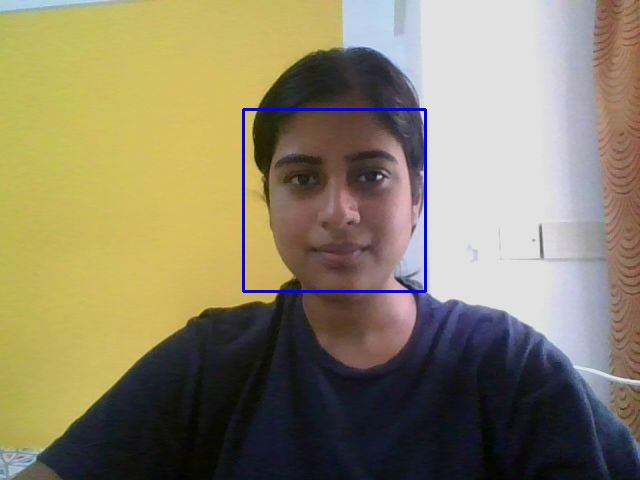

In [ ]:
try:
  filename = take_photo('new_photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
%cd /content/drive/MyDrive/
z_data=[]
new_image = load_img("new_photo.jpg", target_size=image_size, color_mode = "rgb" )
new_image = img_to_array(new_image) / 255.0  # Normalize pixel values

/content/drive/MyDrive


In [ ]:
print(new_image.shape)

(224, 224, 3)


In [ ]:
z_data.append(new_image)
z_data = np.array(z_data)

In [ ]:
z_data.shape

(1, 224, 224, 3)

In [ ]:
z_data= z_data.reshape((len(z_data), np.prod(z_data.shape[1:])))


In [ ]:
z_data.shape

(1, 150528)

In [ ]:
z_data_encoded = encoder.predict(z_data)
print('prediction from SVM')
z_data_encoded_pred = clf.predict(z_data_encoded)
print(z_data_encoded_pred)

1/1 [==============================] - 0s 21ms/step
prediction from SVM
['MS2022503']


In [ ]:
print('prediction from ANN')
z_data_encoded = encoder.predict(z_data)
z_data_encoded_pred = classification_model.predict(z_data_encoded)
original_data = np.argmax(z_data_encoded_pred, axis=1)
print(original_data)

## here the prediction is 33 because
##the labels are with the number of the folder instead of the labe of the folder
## 33 no. folder is infact MS2022503.

prediction from ANN
1/1 [==============================] - 0s 29ms/step
[33]
